In [1]:
from keras.utils import set_random_seed
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os

In [17]:
import gc

gc.collect()

6560

In [2]:
set_random_seed(11)

In [3]:
def grayImg(dir):
        
    file_path=f'./Data/{dir}/'
    x_train=[]
    y_train=[]

    img_list=os.listdir(file_path)

    for i in img_list:
        img = plt.imread(file_path+i)
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
        img=resize(img, (150, 150))
        y_train.append(np.array(img))
        
        imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        # imgGray = 0.3333 * R + 0.3334 * G + 0.3333 * B
        imgGray=resize(imgGray, (150, 150))
        x_train.append(np.array(imgGray))
        
    return x_train, y_train

In [4]:
all_data=os.listdir('./Data/')
x=[]
y=[]
for i in all_data:
    data=grayImg(i)
    x.append(np.array(data[0]))
    y.append(np.array(data[1]))

In [5]:
x_train=x[0]
y_train=y[0]
for i in range(1,4):
    x_train=np.vstack([x_train,x[i]])
    y_train=np.vstack([y_train,y[i]])

x_train.shape, y_train.shape

((9461, 150, 150), (9461, 150, 150, 3))

In [6]:
# 흑백사진 컬러사진 형식으로 변환
x_train=np.stack([x_train,x_train,x_train], axis=3)
x_train.shape

(9461, 150, 150, 3)

In [ ]:
x_train[0,:,:,0].shape

(150, 150)

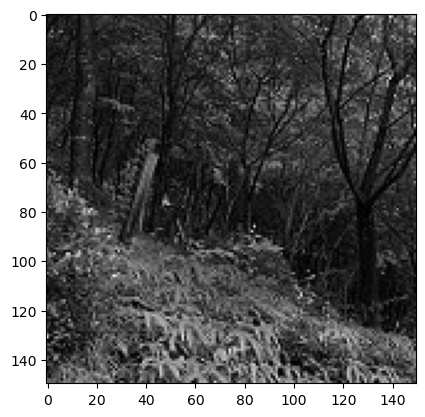

In [10]:
plt.imshow(x_train[0,:,:,0], cmap='gray')
plt.show()

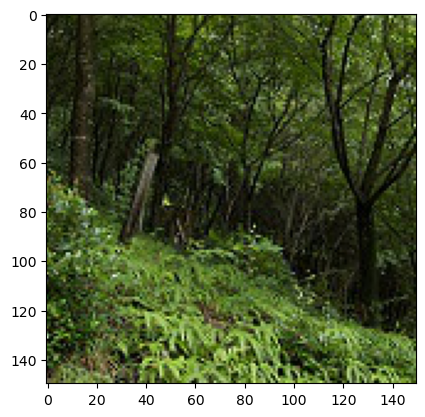

In [11]:
plt.imshow(y_train[0])
plt.show()

In [7]:
# 스케일링
x_train=x_train/255.0/3.0

In [8]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=11)

In [9]:
x_train.shape, x_val.shape, x_test.shape

((5321, 150, 150, 3), (1774, 150, 150, 3), (2366, 150, 150, 3))

In [10]:
def createModel(n_node):
    
    model=Sequential()
    
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(150,150,3)))
    
    
    model.add(Conv2D(50, kernel_size=3, padding='same'))
    
    
    # 출력
    model.add(Conv2D(3,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model


In [12]:
model=createModel(50)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 50)      1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 50)      22550     
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 3)       1353      
                                                                 
Total params: 25,303
Trainable params: 25,303
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
167/167 [==============================] - 311s 2s/step - loss: 0.0185 - val_loss: 0.0084
Epoch 2/10
167/167 [==============================] - 303s 2s/step - loss: 0.0085 - val_loss: 0.0080
Epoch 3/10
167/167 [==============================] - 304s 2s/step - loss: 0.0083 - val_loss: 0.0079
Epoch 4/10
167/167 [==============================] - 305s 2s/step - loss: 0.0083 - val_loss: 0.0078
Epoch 5/10
167/167 [==============================] - 306s 2s/step - loss: 0.0083 - val_loss: 0.0078
Epoch 6/10
167/167 [==============================] - 299s 2s/step - loss: 0.0083 - val_loss: 0.0077
Epoch 7/10
167/167 [==============================] - 296s 2s/step - loss: 0.0082 - val_loss: 0.0078
Epoch 8/10
167/167 [==============================] - 299s 2s/step - loss: 0.0082 - val_loss: 0.0079
Epoch 9/10
167/167 [==============================] - 286s 2s/step - loss: 0.0082 - val_loss: 0.0077
Epoch 10/10
167/167 [==============================] - 294s 2s/step - loss: 0.0082 - val_lo

In [18]:
def test_plt(i):
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.imshow(x_test[i].reshape(150,150,3))
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(132)
    pre_out=model.predict(x_test[i].reshape(-1,150,150,3))
    plt.imshow(pre_out.reshape(150,150,3))
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(133)
    plt.imshow(y_test[i])
    plt.xticks([], [])
    plt.yticks([], [])

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 194ms/step


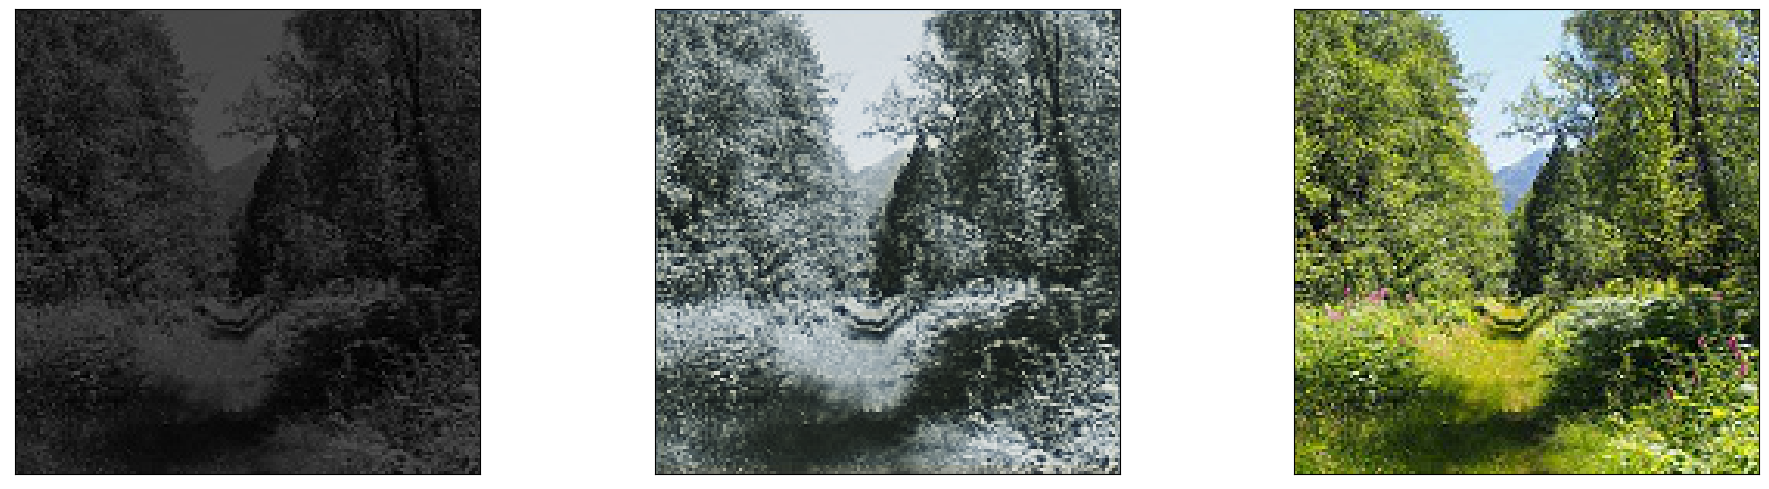

In [19]:
test_plt(100)

In [14]:
from keras.models import save_model
save_model(model, 'model10r.h5')

In [20]:
np.save('x_test.h5', x_test)

In [21]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_test', x_test)
np.save('y_test', y_test)
np.save('x_val', x_val)
np.save('y_val', y_val)
